Import Data

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [3]:
X_train.head(3)

,country,team,season,md,outcome,Cluster,win,goals,gd,opp_gd,avg_starter_age,win%
0,4,154,2018,13,1,2,0,0.2,0.500000,0.500000,0.531856,0.076923
1,4,179,2010,19,1,2,0,0.1,0.500000,0.500000,0.443609,0.105263
2,2,31,2006,6,0,0,0,0.0,0.444444,0.555556,0.511278,0.500000


In [4]:
y_train.head(3)

,total_starter_value
0,0.043594
1,0.045374
2,0.122798


## Best Subset Selection

In [ ]:
import statsmodels.api as sm
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
import itertools
import time
def getBest(k):

    tic = time.time()

    results = []

    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))

    # Create datafrme and add results
    models = pd.DataFrame(results)

    # Choose the model with the min RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x.columns)))

tic = time.time()
predictors = X_train.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'md', 'outcome

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 12 models on 1 predictors in 0.1299731731414795 seconds.
Processed 66 models on 2 predictors in 0.9852676391601562 seconds.
Processed 220 models on 3 predictors in 4.525056838989258 seconds.
Processed 495 models on 4 predictors in 12.271665334701538 seconds.
Processed 792 models on 5 predictors in 24.28506565093994 seconds.
Processed 924 models on 6 predictors in 33.641374349594116 seconds.
Total elapsed time: 75.9264624118805 seconds.


In [ ]:
models_best

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,635.278875,<statsmodels.regression.linear_model.Regressio...
5,640.429805,<statsmodels.regression.linear_model.Regressio...
6,666.733506,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.461882
2    0.461927
3    0.462239
4    0.466223
5    0.470626
6    0.493882
dtype: float64

Text(0, 0.5, 'BIC')

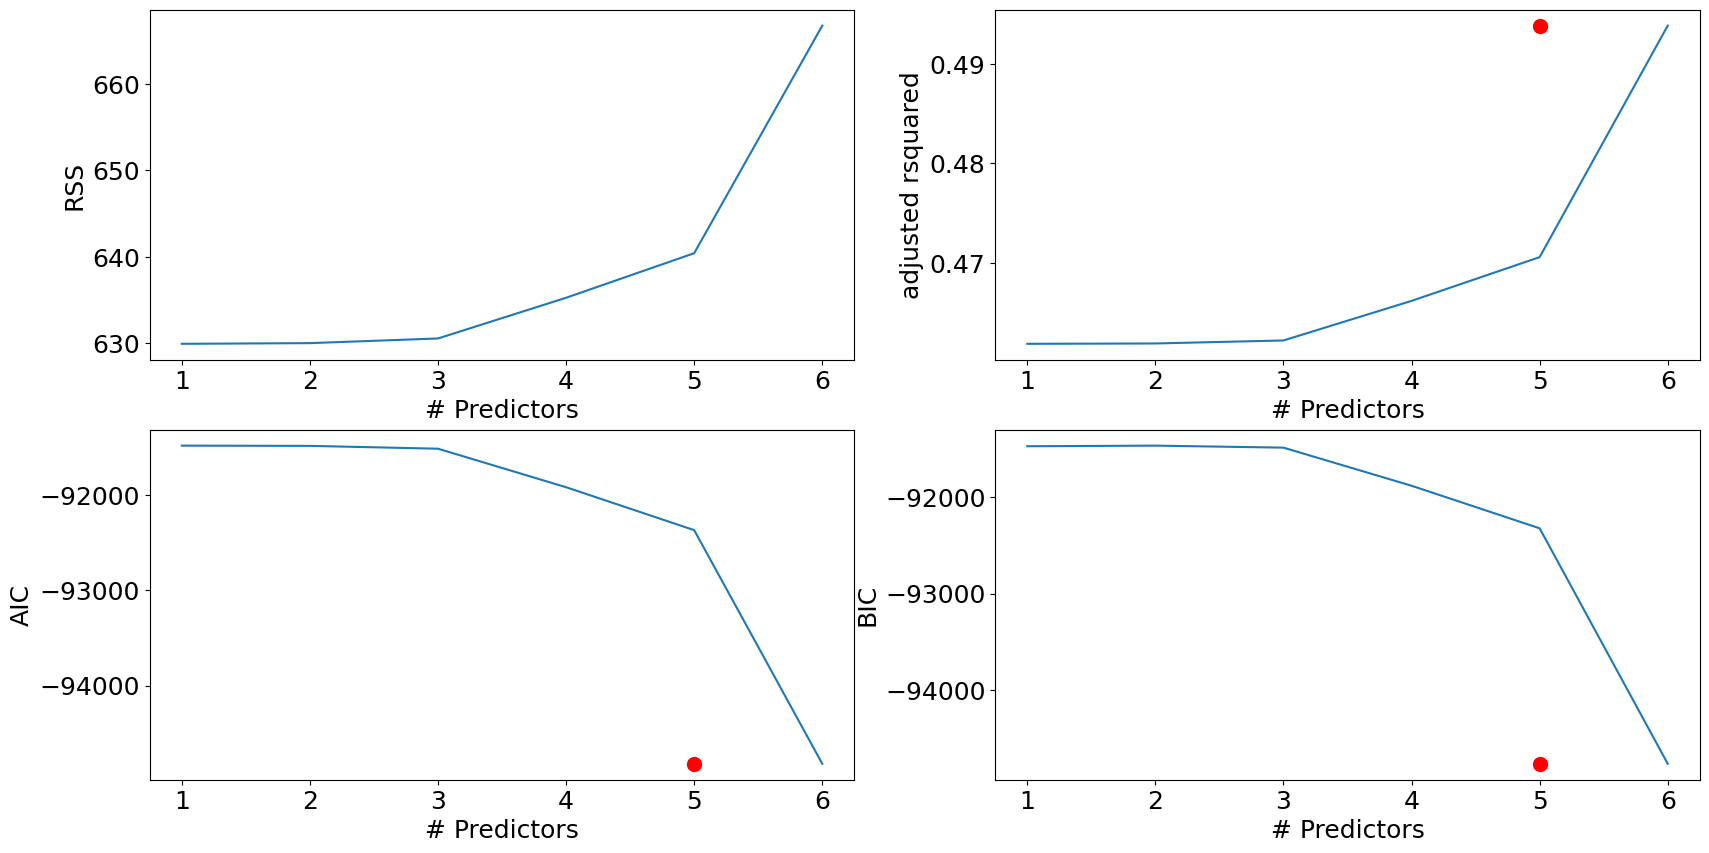

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

## Backward Selection

In [ ]:
import statsmodels.api as sm
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
from numpy.core.multiarray import dtype
def backward(predictors):

    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        print(combo)
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    print(f'Data type for arg min: {models["RSS"].dtype}')
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x.columns)))

tic = time.time()
predictors = X_train.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'win', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'Cluster', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'outcome', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'md', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'season', 'outcome', 'Cluster', 'win', 'goals', 'gd', 'opp_gd', 'avg_starter_age', 'win%')
('country', 'team', 'md', 'outcome

In [ ]:
models_bwd

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,660.232367,<statsmodels.regression.linear_model.Regressio...
5,662.024778,<statsmodels.regression.linear_model.Regressio...
6,670.994095,<statsmodels.regression.linear_model.Regressio...
7,675.309776,<statsmodels.regression.linear_model.Regressio...
8,680.184685,<statsmodels.regression.linear_model.Regressio...
9,684.429983,<statsmodels.regression.linear_model.Regressio...
10,757.094401,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_bwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.461882
2     0.461927
3     0.462239
4     0.488396
5     0.489895
6     0.498033
7     0.501599
8     0.505726
9     0.509348
10    0.210439
11    0.406656
dtype: float64

Text(0, 0.5, 'BIC')

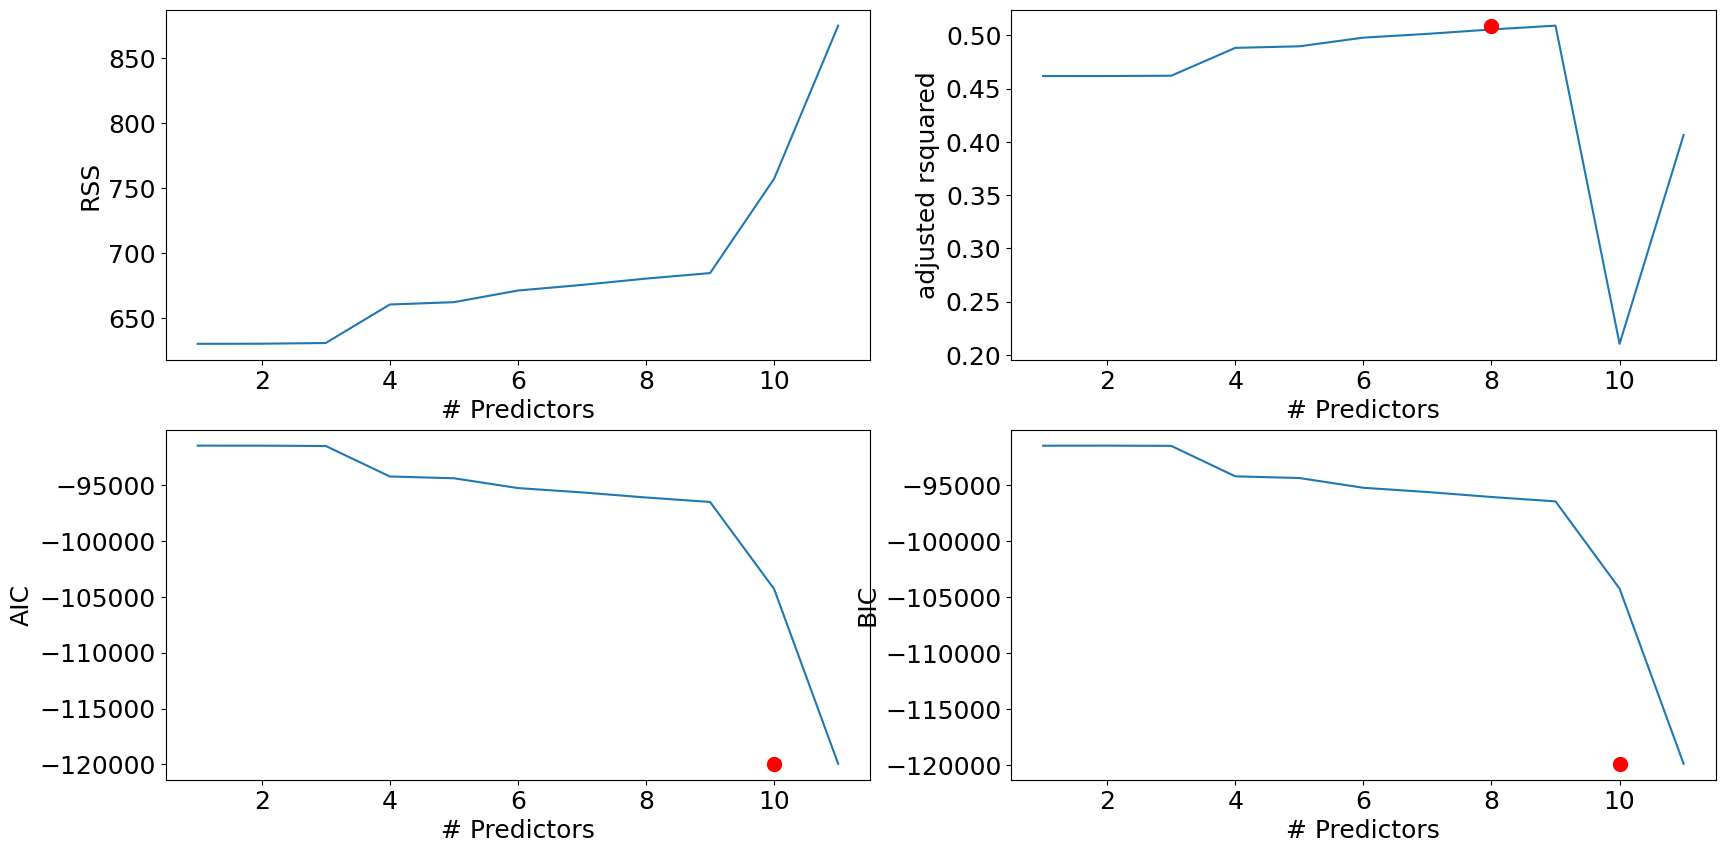

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_bwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_bwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_bwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_bwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

# Forward Selection

In [ ]:
import statsmodels.api as sm
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    print(models)
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X_train.columns)+1):
  #Run model with i variables
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

                                                model          RSS
0   <statsmodels.regression.linear_model.Regressio...   817.449879
1   <statsmodels.regression.linear_model.Regressio...   766.376913
2   <statsmodels.regression.linear_model.Regressio...   629.956058
3   <statsmodels.regression.linear_model.Regressio...   764.375659
4   <statsmodels.regression.linear_model.Regressio...   875.756781
5   <statsmodels.regression.linear_model.Regressio...  1210.098346
6   <statsmodels.regression.linear_model.Regressio...   996.243900
7   <statsmodels.regression.linear_model.Regressio...   897.451909
8   <statsmodels.regression.linear_model.Regressio...   651.002692
9   <statsmodels.regression.linear_model.Regressio...   655.080932
10  <statsmodels.regression.linear_model.Regressio...   642.475732
11  <statsmodels.regression.linear_model.Regressio...   792.529091
Processed  12 models on 1 predictors in 0.10958433151245117 seconds.
                                                model       

In [ ]:
models_fwd

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,635.278875,<statsmodels.regression.linear_model.Regressio...
5,640.429805,<statsmodels.regression.linear_model.Regressio...
6,669.659864,<statsmodels.regression.linear_model.Regressio...
7,671.4222,<statsmodels.regression.linear_model.Regressio...
8,680.198829,<statsmodels.regression.linear_model.Regressio...
9,684.429983,<statsmodels.regression.linear_model.Regressio...
10,757.094401,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_fwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.461882
2     0.461927
3     0.462239
4     0.466223
5     0.470626
6     0.496411
7     0.497885
8     0.505854
9     0.509348
10    0.210439
11    0.406656
12    0.533425
dtype: float64

Text(0, 0.5, 'BIC')

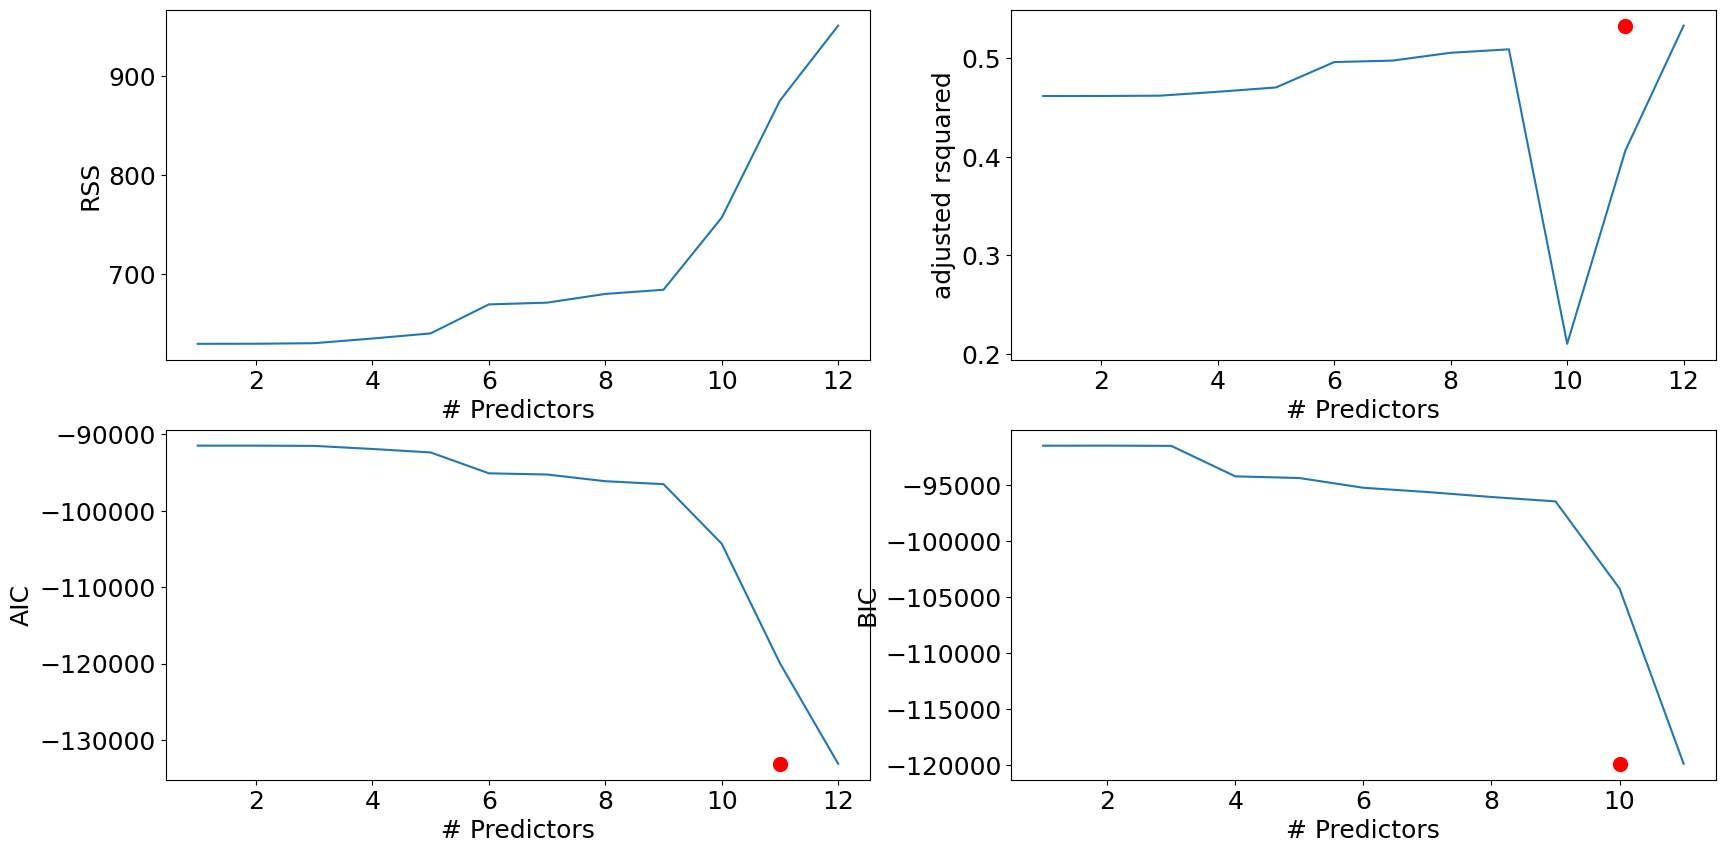

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_fwd["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_fwd.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_fwd.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_bwd.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

# Subset Selection Summary

In [ ]:
models_best

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,635.278875,<statsmodels.regression.linear_model.Regressio...
5,640.429805,<statsmodels.regression.linear_model.Regressio...
6,666.733506,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

1    0.461882
2    0.461927
3    0.462239
4    0.466223
5    0.470626
6    0.493882
dtype: float64

In [ ]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].params)

------------
Best Subset:
------------
country   -0.006399
team      -0.000036
season     0.000046
md        -0.000091
outcome    0.014101
win        0.025544
dtype: float64


In [ ]:
best_model_best = models_best.loc[6, "model"]
best_model_best

In [ ]:
models_fwd

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,635.278875,<statsmodels.regression.linear_model.Regressio...
5,640.429805,<statsmodels.regression.linear_model.Regressio...
6,669.659864,<statsmodels.regression.linear_model.Regressio...
7,671.4222,<statsmodels.regression.linear_model.Regressio...
8,680.198829,<statsmodels.regression.linear_model.Regressio...
9,684.429983,<statsmodels.regression.linear_model.Regressio...
10,757.094401,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_fwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.461882
2     0.461927
3     0.462239
4     0.466223
5     0.470626
6     0.496411
7     0.497885
8     0.505854
9     0.509348
10    0.210439
11    0.406656
12    0.533425
dtype: float64

In [ ]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[12, "model"].params)

-----------------
Foward Selection:
-----------------
season              0.005035
md                 -0.000076
team               -0.000012
country            -0.004259
avg_starter_age    -0.020924
outcome            -0.005798
win                -0.011989
gd                -10.051166
goals               0.040503
opp_gd            -10.144801
win%                0.172557
Cluster             0.052797
dtype: float64


In [ ]:
best_model_fwd = models_fwd.loc[12, "model"]
best_model_fwd

In [ ]:
models_bwd

,RSS,model
1,629.956058,<statsmodels.regression.linear_model.Regressio...
2,630.034782,<statsmodels.regression.linear_model.Regressio...
3,630.574238,<statsmodels.regression.linear_model.Regressio...
4,660.232367,<statsmodels.regression.linear_model.Regressio...
5,662.024778,<statsmodels.regression.linear_model.Regressio...
6,670.994095,<statsmodels.regression.linear_model.Regressio...
7,675.309776,<statsmodels.regression.linear_model.Regressio...
8,680.184685,<statsmodels.regression.linear_model.Regressio...
9,684.429983,<statsmodels.regression.linear_model.Regressio...
10,757.094401,<statsmodels.regression.linear_model.Regressio...


In [ ]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_bwd.apply(lambda row: row[1].rsquared, axis=1)

1     0.461882
2     0.461927
3     0.462239
4     0.488396
5     0.489895
6     0.498033
7     0.501599
8     0.505726
9     0.509348
10    0.210439
11    0.406656
dtype: float64

In [ ]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[9, "model"].params)

-------------------
Backward Selection:
-------------------
country           -0.005898
team              -0.000037
season             0.000040
md                -0.000168
outcome           -0.006415
win                0.014944
goals              0.105205
gd                 0.160345
avg_starter_age   -0.104196
dtype: float64


In [ ]:
best_model_bwd = models_bwd.loc[9, "model"]
best_model_bwd

#Best Params

In [ ]:
x_train.columns

Index(['country', 'season', 'md', 'outcome', 'Cluster', 'win', 'goals', 'gd',
       'opp_gd', 'avg_starter_age', 'win%'],
      dtype='object')

In [ ]:
y_train.columns

Index(['total_starter_value'], dtype='object')

In [ ]:
models_best = ['country', 'team', 'season', 'md', 'outcome', 'win%']
models_forward = ['season', 'md', 'team', 'country', 'avg_starter_age', 'outcome', 'win%', 'gd', 'goals', 'opp_gd', 'win%', 'Cluster']
models_backward = ['country', 'team', 'season', 'md', 'outcome', 'win%', 'goals', 'gd', 'avg_starter_age']

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(list(zip(models_best, models_forward, models_backward)), columns = ['Best Subset', 'Foward Selection', 'Backward Selection'])
df

,Best Subset,Foward Selection,Backward Selection
0,country,season,country
1,team,md,team
2,season,team,season
3,md,country,md
4,outcome,avg_starter_age,outcome
5,win%,outcome,win%
